<a href="https://colab.research.google.com/github/abishek2019/DeepLearning/blob/main/Digit_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.utils.data as data
from torchvision import datasets as d, transforms as t
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module="torch.utils.data")

In [3]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [4]:
batch_size = 10
learning_rate = 0.001
epochs = 10

In [5]:
# 1. Load and normalize the data
transform = t.Compose([t.ToTensor(), t.Normalize((0.1307), (0.3081,))])
train_set = d.MNIST(root='./data', train=True, download=True, transform=transform)
test_set = d.MNIST(root='./data', train=False, download=True, transform=transform)
trainloader = data.DataLoader(train_set, batch_size=batch_size, shuffle=True, num_workers=2)
testloader = data.DataLoader(test_set, batch_size=batch_size, shuffle=False, num_workers=2)

100%|██████████| 9912422/9912422 [00:00<00:00, 390451923.29it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw


100%|██████████| 28881/28881 [00:00<00:00, 25310424.95it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw




100%|██████████| 1648877/1648877 [00:00<00:00, 149322927.70it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 10513536.85it/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [6]:
print(train_set.targets)
print(len(train_set))
print(len(trainloader))
print(next(iter(trainloader))[1])

tensor([5, 0, 4,  ..., 5, 6, 8])
60000
6000
tensor([8, 1, 4, 0, 9, 3, 6, 6, 2, 5])


In [7]:
# 2. Define the model
# Image size 1*28*28, n_f1 = 20, n_f2 = 40, f = 5*5, s = 1, p = 0, pool = 2*2
#FCN1 = 200, FCN2 = 200, OP = 10
class Digit_Classification(nn.Module):
  def __init__(self):
    super(Digit_Classification, self).__init__()
    self.conv1 = nn.Conv2d(in_channels=1, out_channels=20,kernel_size=5, stride=1, padding=0)
    self.relu = nn.ReLU()
    self.pool = nn.MaxPool2d(2, 2)
    self.conv2 = nn.Conv2d(in_channels=20, out_channels=40,kernel_size=5, stride=1, padding=0)
    self.flatten = nn.Flatten()
    self.fcn1 = nn.Linear(40*4*4, 200)
    self.dropout = nn.Dropout(p = 0.5)
    self.fcn2 = nn.Linear(200, 200)
    self.fcn3 = nn.Linear(200, 10)
    self.softmax = nn.Softmax(dim = 1)

  def forward(self, x):
    x = self.pool(self.relu(self.conv2(self.pool(self.relu(self.conv1(x))))))
    x = self.flatten(x)
    x = self.softmax(self.fcn3(self.dropout(self.relu(self.fcn2(self.dropout(self.relu(self.fcn1(x))))))))
    return x
model = Digit_Classification().to(device)

In [8]:
# 3. Define the loss functions and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=learning_rate, momentum=0.9)

In [9]:
# 4. Train the model
for epoch in range(epochs):
  running_loss = 0.0
  for i, (digits, labels) in enumerate(trainloader):
    #  Get the data
    digits = digits.to(device)
    labels = labels.to(device)
    # set Zero Grad
    optimizer.zero_grad()
    # Forward
    outputs = model(digits)
    loss = loss_fn(outputs, labels)
    # Backwards
    loss.backward()
    # Optimize
    optimizer.step()
    running_loss += loss.item()
    if (i + 1) % 1000 == 0:
      print(f'Epoch: {epoch + 1}, Batch: {i + 1}, Losss: {running_loss/1000:.2f}.')
      running_loss = 0.0
torch.save(model.state_dict(), 'model.pth')

Epoch: 1, Batch: 1000, Losss: 2.30.
Epoch: 1, Batch: 2000, Losss: 2.25.
Epoch: 1, Batch: 3000, Losss: 1.93.
Epoch: 1, Batch: 4000, Losss: 1.75.
Epoch: 1, Batch: 5000, Losss: 1.66.
Epoch: 1, Batch: 6000, Losss: 1.60.
Epoch: 2, Batch: 1000, Losss: 1.57.
Epoch: 2, Batch: 2000, Losss: 1.56.
Epoch: 2, Batch: 3000, Losss: 1.56.
Epoch: 2, Batch: 4000, Losss: 1.54.
Epoch: 2, Batch: 5000, Losss: 1.54.
Epoch: 2, Batch: 6000, Losss: 1.53.
Epoch: 3, Batch: 1000, Losss: 1.52.
Epoch: 3, Batch: 2000, Losss: 1.52.
Epoch: 3, Batch: 3000, Losss: 1.52.
Epoch: 3, Batch: 4000, Losss: 1.52.
Epoch: 3, Batch: 5000, Losss: 1.52.
Epoch: 3, Batch: 6000, Losss: 1.51.
Epoch: 4, Batch: 1000, Losss: 1.51.
Epoch: 4, Batch: 2000, Losss: 1.51.
Epoch: 4, Batch: 3000, Losss: 1.51.
Epoch: 4, Batch: 4000, Losss: 1.51.
Epoch: 4, Batch: 5000, Losss: 1.50.
Epoch: 4, Batch: 6000, Losss: 1.51.
Epoch: 5, Batch: 1000, Losss: 1.50.
Epoch: 5, Batch: 2000, Losss: 1.50.
Epoch: 5, Batch: 3000, Losss: 1.50.
Epoch: 5, Batch: 4000, Losss

In [10]:
# 5. Test the model
correct = 0
total = 0
model = Digit_Classification().to(device)
model.load_state_dict(torch.load('model.pth'))
model.eval()
with torch.no_grad():
  for i, (images, labels) in enumerate(testloader):
    images, labels = images.to(device), labels.to(device)
    outputs = model(images)
    _, predictions = torch.max(outputs.data, 1)
    correct += (predictions == labels).sum().item()
    total += labels.size(0)
print(f'Accuracy: {100 * correct / total}%')

Accuracy: 98.48%


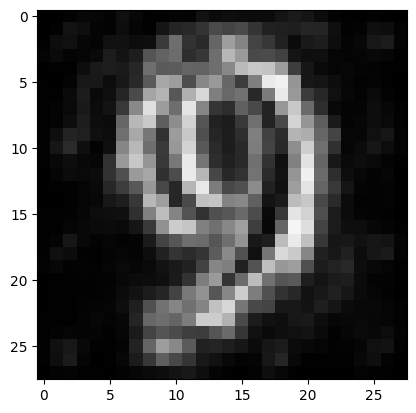

The predicted digit is: 9



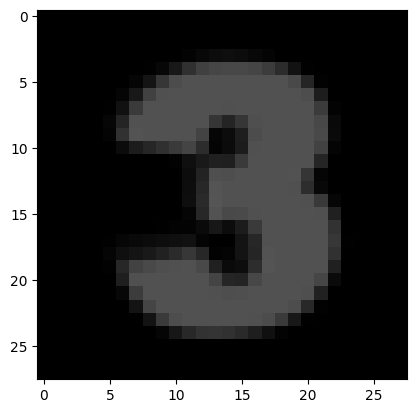

The predicted digit is: 3



In [75]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import torchvision

# function to show an image
def imshow(img):
    img = img / 2 + 0.5  # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# 6. Predict new digit
def prep_and_predict(original_image):
  # Input_digit is a color image so we need to first convert it to Grayscale and transfer to size 28*28 as the model requires it.
  # -preprocess
  transform = t.Compose([
      t.Resize((28, 28)),
      t.ToTensor(),
      t.Normalize((0.5), (0.5,))
      ])
  grayscale_digit = original_image.convert('L')
  input_tensor = transform(grayscale_digit).unsqueeze(0).to(device)

  # -predict
  with torch.no_grad():
    output = model(input_tensor)
    _, prediction = torch.max(output.data, 1)
  # prediction = classes[prediction.item()]
  prediction = prediction.item()
  # show custom image
  imshow(torchvision.utils.make_grid(input_tensor.to('cpu')))
  print(f'The predicted digit is: {prediction}\n')

test_images = ['9.webp', '3.png']
for image in test_images:
  original_image = Image.open(image)
  prediction = prep_and_predict(original_image)